In [1]:
import twint
import nest_asyncio
nest_asyncio.apply()
import time
import pandas as pd
import os
import re

In [12]:
import pandas as pd
import twint
import nest_asyncio
nest_asyncio.apply()
c = twint.Config()
c.Search = "행복 OR 기쁨 OR 웃음 OR 신남 OR 즐거움"
c.Limit = 100000
c.Pandas = True
c.Hide_output= True
twint.run.Search(c)
Tweets_df = twint.storage.panda.Tweets_df

In [10]:
print(Tweets_df)

                       id      conversation_id    created_at  \
0     1555890410912124929  1555890410912124929  1.659788e+12   
1     1555890371296497669  1555890371296497669  1.659788e+12   
2     1555890368310169601  1555773514354868225  1.659788e+12   
3     1555890355551100928  1555843640924073986  1.659788e+12   
4     1555890336186388480  1555890336186388480  1.659788e+12   
...                   ...                  ...           ...   
6010  1555598444311748608  1555598444311748608  1.659719e+12   
6011  1555598428457283584  1555598428457283584  1.659719e+12   
6012  1555598424346546182  1555598424346546182  1.659719e+12   
6013  1555598402053763072  1555597063882059776  1.659719e+12   
6014  1555598305475719168  1555534036038479872  1.659719e+12   

                     date timezone place  \
0     2022-08-06 21:15:55    +0900         
1     2022-08-06 21:15:46    +0900         
2     2022-08-06 21:15:45    +0900         
3     2022-08-06 21:15:42    +0900         
4     2022-

In [13]:
Tweets_df.to_csv('./data_pleasure.csv', index=False, encoding="utf-8-sig")

In [16]:
Tweets_df['tweet'].nunique(), Tweets_df['id'].nunique()

(92318, 100006)

In [19]:
Tweets_df.drop_duplicates(subset=['tweet'], inplace=True)

In [20]:
print('총 샘플의 수 :',len(Tweets_df))

총 샘플의 수 : 92318


In [25]:
print(Tweets_df.isnull().sum())

id                 0
conversation_id    0
created_at         0
date               0
timezone           0
place              0
tweet              0
language           0
hashtags           0
cashtags           0
user_id            0
user_id_str        0
username           0
name               0
day                0
hour               0
link               0
urls               0
photos             0
video              0
thumbnail          0
retweet            0
nlikes             0
nreplies           0
nretweets          0
quote_url          0
search             0
near               0
geo                0
source             0
user_rt_id         0
user_rt            0
retweet_id         0
reply_to           0
retweet_date       0
translate          0
trans_src          0
trans_dest         0
dtype: int64


In [28]:
Tweets_df['tweet'] = Tweets_df['tweet'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
Tweets_df[:5]['tweet']

C:\Users\comet\AppData\Local\Temp\ipykernel_1516\1703485633.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Tweets_df['tweet'] = Tweets_df['tweet'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


0          아 씨발 개처웃음 존나 웃김 캐해 레전드다
1               갤러리 보다가 갑자기 보고 개웃음
2                                 
3    바밍 라이브 너무 신남 한국에서 라이브 좀 자주 해라
4              그대는 늘 행복의 한복판에 있길  
Name: tweet, dtype: object

In [29]:
Tweets_df['tweet'] = Tweets_df['tweet'].str.replace('^ +', "")

C:\Users\comet\AppData\Local\Temp\ipykernel_1516\2424246514.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Tweets_df['tweet'] = Tweets_df['tweet'].str.replace('^ +', "")


In [31]:
import numpy as np
Tweets_df['tweet'].replace('', np.nan, inplace=True)
print(Tweets_df['tweet'].isnull().sum())

2442


In [32]:
Tweets_df.loc[Tweets_df.tweet.isnull()][:5]

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
2,1555891887986311169,1555890094711930880,1.659789e+12,2022-08-06 21:21:47,+0900,,NaN,qme,[],[],...,,,,,,"[{'screen_name': 'se____lene', 'name': '𝙲𝙷𝙰', ...",,,,
101,1555890713367281664,1555889142902448130,1.659788e+12,2022-08-06 21:17:07,+0900,,NaN,en,[],[],...,,,,,,"[{'screen_name': 'gg___wp____', 'name': 'j', '...",,,,
151,1555890047236411392,1555889142902448130,1.659788e+12,2022-08-06 21:14:28,+0900,,NaN,en,[],[],...,,,,,,"[{'screen_name': 'gg___wp____', 'name': 'j', '...",,,,
161,1555889989791072257,1555889989791072257,1.659788e+12,2022-08-06 21:14:15,+0900,,NaN,th,[],[],...,,,,,,[],,,,
185,1555889742541201409,1555889142902448130,1.659788e+12,2022-08-06 21:13:16,+0900,,NaN,qme,[],[],...,,,,,,"[{'screen_name': 'gg___wp____', 'name': 'j', '...",,,,


In [33]:
Tweets_df = Tweets_df.dropna(how='any')

In [34]:
print(len(Tweets_df))

89876


In [37]:
Tweets_df[:10]['tweet']

0                               아 씨발 개처웃음 존나 웃김 캐해 레전드다
1                                    갤러리 보다가 갑자기 보고 개웃음
3                         바밍 라이브 너무 신남 한국에서 라이브 좀 자주 해라
4                                   그대는 늘 행복의 한복판에 있길  
5     인문학을 한다는 자부심 연구하고 싶은 주제에 매달리는 기쁨 등이 내 삶의 추진력이다...
6     옛날엔 하루하루가 행복했던거같은데 지금은 행복을 찾을 길이 없어 이게 다 돈때문이야...
7                                            조심해서 들어가야햐
8                           ㅋㅋㅋㅋㅋㅋㅋㅋㅋ고생햇어 행복과 육체를 맞바꿨구나
9                                         응 사실 기쁨의 눈물  
10                                 우래들 행복하기만 해나도 행복만 할래
Name: tweet, dtype: object

In [44]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from matplotlib import rc
import pandas as pd 
import urllib.request

In [45]:
urllib.request.urlretrieve("http://macsplex.com/?module=file&act=procFileDownload&file_srl=2851&sid=ea4a36b12467c4446c21e70762c7d10f&module_srl=2822g", filename="AppleGothic.ttf")

('AppleGothic.ttf', <http.client.HTTPMessage at 0x2eea1592100>)

In [46]:
comment_words = ''
stopwords = set(STOPWORDS)

tokenized_text = []

In [47]:
for val in Tweets_df["tweet"]:

  # 문장을 string으로 만들기
  val = str(val)

  # 문장을 쪼개기
  tokens = val.split()

  tokenized_text.append(tokens)
  comment_words += " ".join(tokens) + " "

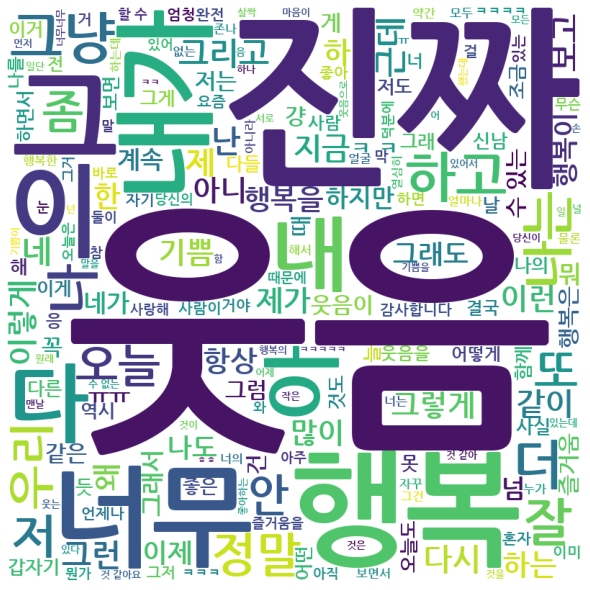

In [48]:
wordcloud = WordCloud(width = 800, height = 800, 
                font_path='AppleGothic.ttf',
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [57]:
token_count =dict()

In [64]:
for val in Tweets_df["tweet"]:

  # 문장을 string으로 만들기
  val = str(val)

  # 문장을 쪼개기
  tokens = val.split()
  for i in range(len(tokens)):
    if tokens[i] in token_count.keys():
      token_count[tokens[i]] +=1
    else:
      token_count[tokens[i]] = 1
  tokenized_text.append(tokens)

In [76]:
token_cnt_li = list(token_count.items())

In [75]:
print(token_count['아'])

3799


In [80]:
print(token_cnt_li[0][1])

3799


In [84]:
token_cnt_li.sort(key=lambda x:x[1], reverse=True)

In [89]:
print(token_cnt_li[:100])

[('웃음', 11725), ('너무', 8417), ('행복', 7689), ('진짜', 6157), ('그', 5524), ('수', 5373), ('행복을', 4714), ('내', 4647), ('웃음이', 4128), ('것', 3929), ('이', 3887), ('더', 3849), ('아', 3799), ('웃음을', 3775), ('내가', 3733), ('다', 3512), ('거', 3447), ('나', 3188), ('잘', 3132), ('안', 3056), ('하고', 2756), ('보고', 2549), ('오늘', 2537), ('있는', 2531), ('그냥', 2457), ('한', 2375), ('우리', 2362), ('근데', 2306), ('정말', 2292), ('나는', 2291), ('행복이', 2280), ('저', 2259), ('또', 2141), ('네', 2129), ('게', 2012), ('하는', 1987), ('좀', 1945), ('많이', 1904), ('그런', 1874), ('지금', 1851), ('난', 1789), ('기쁨', 1777), ('때', 1756), ('그리고', 1728), ('ㅋ', 1677), ('제', 1675), ('행복만', 1672), ('왜', 1670), ('건', 1641), ('할', 1641), ('이런', 1622), ('넘', 1597), ('같이', 1583), ('나의', 1573), ('이렇게', 1572), ('좋은', 1567), ('다시', 1564), ('하', 1512), ('아니', 1501), ('항상', 1493), ('그렇게', 1415), ('나도', 1393), ('같은', 1381), ('이제', 1313), ('행복은', 1265), ('없는', 1256), ('함께', 1228), ('제가', 1214), ('네가', 1190), ('즐거움', 1186), ('못', 1183), ('다른', 1179), ('보면', 1

In [90]:
pleasure_word = []

In [91]:
for i in range(100):
    pleasure_word.append(token_cnt_li[i][0])

In [92]:
print(pleasure_word)

['웃음', '너무', '행복', '진짜', '그', '수', '행복을', '내', '웃음이', '것', '이', '더', '아', '웃음을', '내가', '다', '거', '나', '잘', '안', '하고', '보고', '오늘', '있는', '그냥', '한', '우리', '근데', '정말', '나는', '행복이', '저', '또', '네', '게', '하는', '좀', '많이', '그런', '지금', '난', '기쁨', '때', '그리고', 'ㅋ', '제', '행복만', '왜', '건', '할', '이런', '넘', '같이', '나의', '이렇게', '좋은', '다시', '하', '아니', '항상', '그렇게', '나도', '같은', '이제', '행복은', '없는', '함께', '제가', '네가', '즐거움', '못', '다른', '보면', '걸', '그래도', '모든', '이거', '계속', '사람', '하지만', '뭐', '신남', '것도', '이게', '하루', '꼭', '오늘도', '날', '해', '그래서', '말', '큰', '걍', '사랑해', '그럼', '행복한', '그게', '늘', 'ㅋㅋ', '사람이']


In [95]:
nest_asyncio.apply()
c = twint.Config()
c.Search = "개쌍년 OR 분노 OR 격노 OR 분개 OR 씹새끼"
c.Limit = 100000
c.Pandas = True
c.Hide_output= True
twint.run.Search(c)
Tweets_df2 = twint.storage.panda.Tweets_df

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [96]:
print(Tweets_df2)

                        id      conversation_id    created_at  \
0      1556003510168485888  1555986214909792257  1.659815e+12   
1      1556002953927938049  1555793618358894593  1.659815e+12   
2      1556002797203558402  1556002797203558402  1.659815e+12   
3      1556002705780355072  1556002705780355072  1.659815e+12   
4      1556000626634784768  1556000626634784768  1.659814e+12   
...                    ...                  ...           ...   
25340  1552342154667708416  1552342154667708416  1.658942e+12   
25341  1552342071515627521  1552342071515627521  1.658942e+12   
25342  1552342024694956032  1552342024694956032  1.658942e+12   
25343  1552341969451372546  1552341969451372546  1.658942e+12   
25344  1552341964867047424  1552326566306148352  1.658942e+12   

                      date timezone place  \
0      2022-08-07 04:45:20    +0900         
1      2022-08-07 04:43:08    +0900         
2      2022-08-07 04:42:30    +0900         
3      2022-08-07 04:42:08    +0900    

In [97]:
Tweets_df2.to_csv('./data_anger.csv', index=False, encoding="utf-8-sig")

In [98]:
Tweets_df2['tweet'].nunique(), Tweets_df['id'].nunique()

(24105, 89876)

In [99]:
Tweets_df2.drop_duplicates(subset=['tweet'], inplace=True)

In [100]:
print('총 샘플의 수 :',len(Tweets_df2))

총 샘플의 수 : 24105


In [101]:
Tweets_df2['tweet'] = Tweets_df2['tweet'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
Tweets_df2[:5]['tweet']

C:\Users\comet\AppData\Local\Temp\ipykernel_1516\3506912279.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Tweets_df2['tweet'] = Tweets_df2['tweet'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


0    억지력으로 남게해달라고요 미친새끼등라 작별도 제대로못하고 이렇게 사라진다고 이게말이...
1    쪼마랴 노선 너무너무 즐거웠음 분노 가득하고 아버지와 참 닮은 쪼마랴  그리고 다시...
2    분노가 자신을 향할 때 우울이 된다 우울한 사람은 사실 분노하고 있는 것이다 왜 누...
3          이집트가  전투기 써본후 격노해  역대급 전면교체 선포한 충격 상황   출처 
4    데연시해봤는데 번역의한계인진몰라도 존나그냥 몰입안돼 근데 제작진도 장난치면서 만든게...
Name: tweet, dtype: object

In [102]:
Tweets_df2['tweet'] = Tweets_df2['tweet'].str.replace('^ +', "")

C:\Users\comet\AppData\Local\Temp\ipykernel_1516\2899577528.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Tweets_df2['tweet'] = Tweets_df2['tweet'].str.replace('^ +', "")


In [103]:
import numpy as np
Tweets_df2['tweet'].replace('', np.nan, inplace=True)
print(Tweets_df2['tweet'].isnull().sum())

354


In [104]:
Tweets_df2.loc[Tweets_df2.tweet.isnull()][:5]

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
114,1555980567170101248,1555980567170101248,1.659810e+12,2022-08-07 03:14:10,+0900,,NaN,zxx,[],[],...,,,,,,[],,,,
130,1555977753828405248,1555977753828405248,1.659809e+12,2022-08-07 03:02:59,+0900,,NaN,zxx,[],[],...,,,,,,[],,,,
383,1555945974673072128,1555678514397040640,1.659801e+12,2022-08-07 00:56:43,+0900,,NaN,ru,[],[],...,,,,,,"[{'screen_name': 'crim3s_Vas', 'name': 'X💜X💜',...",,,,
406,1555944158631985152,1555943966700634114,1.659801e+12,2022-08-07 00:49:30,+0900,,NaN,zxx,[],[],...,,,,,,[],,,,
519,1555935297610719235,1555933464196947968,1.659799e+12,2022-08-07 00:14:17,+0900,,NaN,qme,[],[],...,,,,,,[],,,,


In [105]:
Tweets_df2 = Tweets_df2.dropna(how='any')

In [106]:
print(len(Tweets_df2))

23751


In [107]:
Tweets_df2[:10]['tweet']

0    억지력으로 남게해달라고요 미친새끼등라 작별도 제대로못하고 이렇게 사라진다고 이게말이...
1    쪼마랴 노선 너무너무 즐거웠음 분노 가득하고 아버지와 참 닮은 쪼마랴  그리고 다시...
2    분노가 자신을 향할 때 우울이 된다 우울한 사람은 사실 분노하고 있는 것이다 왜 누...
3          이집트가  전투기 써본후 격노해  역대급 전면교체 선포한 충격 상황   출처 
4    데연시해봤는데 번역의한계인진몰라도 존나그냥 몰입안돼 근데 제작진도 장난치면서 만든게...
5    제가 얼마전에 서치하다 분노햇던 리버스캐해트윗이 저거엿는데 시팔ㅋㅋㅋ 하는 생각 다...
6                         아까 잠올때 잘걸 안자고 버티다가 후회하고 분노하고
7    몸을 잔뜩 웅크린 채 한참을 흐느낀다 분노가 가득 차다 못해 넘쳐 온 몸이 떨려온다...
8    잔느 얼터 기억이 있건 없건 내가 잔 다르크라는 사실에 변함은 없어 잔느 분명 그 ...
9    그래서 탄생에 반대되는 것을 택하겠다 이 말이 하고 싶은 겁니까 다른 이도 아닌 그...
Name: tweet, dtype: object

In [108]:
comment_words = ''
stopwords = set(STOPWORDS)

In [109]:
token_count2 =dict()

In [110]:
for val in Tweets_df2["tweet"]:

  # 문장을 string으로 만들기
  val = str(val)

  # 문장을 쪼개기
  tokens = val.split()
  for i in range(len(tokens)):
    if tokens[i] in token_count2.keys():
      token_count2[tokens[i]] +=1
    else:
      token_count2[tokens[i]] = 1
  #tokenized_text.append(tokens)

In [111]:
token_cnt_li2 = list(token_count2.items())

In [114]:
token_cnt_li2.sort(key=lambda x:x[1], reverse=True)

In [115]:
print(token_cnt_li2[:100])

[('분노', 3309), ('그', 1986), ('분노가', 1572), ('진짜', 1566), ('이', 1532), ('분노를', 1384), ('수', 1266), ('분노의', 1249), ('너무', 1186), ('다', 1060), ('내가', 1056), ('왜', 1038), ('안', 1001), ('것', 990), ('더', 984), ('근데', 931), ('내', 916), ('분노하고', 912), ('거', 836), ('그냥', 763), ('아', 719), ('하고', 709), ('대한', 708), ('나', 703), ('한', 675), ('하는', 674), ('나는', 664), ('좀', 642), ('있는', 616), ('또', 615), ('분노와', 599), ('분노에', 595), ('저', 593), ('지금', 587), ('그리고', 579), ('잘', 575), ('보고', 560), ('질투하고', 541), ('게', 538), ('아니', 532), ('그런', 526), ('때', 524), ('할', 522), ('분노로', 518), ('난', 509), ('시기하고', 508), ('없는', 481), ('이런', 467), ('정말', 442), ('분노는', 440), ('분노한', 438), ('분노하는', 433), ('같은', 423), ('시샘하고', 422), ('하', 413), ('다른', 407), ('오늘', 402), ('분개하고', 397), ('미워하고', 394), ('걍', 394), ('다시', 390), ('건', 390), ('그렇게', 376), ('이제', 367), ('못', 367), ('절망하고', 363), ('하지만', 361), ('모든', 348), ('갑자기', 342), ('어떻게', 338), ('그래서', 337), ('존나', 336), ('걸', 324), ('이렇게', 319), ('ㅋ', 313), ('때문에',

In [116]:
angry_word = []

In [117]:
for i in range(100):
    angry_word.append(token_cnt_li2[i][0])

In [118]:
print(angry_word)

['분노', '그', '분노가', '진짜', '이', '분노를', '수', '분노의', '너무', '다', '내가', '왜', '안', '것', '더', '근데', '내', '분노하고', '거', '그냥', '아', '하고', '대한', '나', '한', '하는', '나는', '좀', '있는', '또', '분노와', '분노에', '저', '지금', '그리고', '잘', '보고', '질투하고', '게', '아니', '그런', '때', '할', '분노로', '난', '시기하고', '없는', '이런', '정말', '분노는', '분노한', '분노하는', '같은', '시샘하고', '하', '다른', '오늘', '분개하고', '미워하고', '걍', '다시', '건', '그렇게', '이제', '못', '절망하고', '하지만', '모든', '갑자기', '어떻게', '그래서', '존나', '걸', '이렇게', 'ㅋ', '때문에', '보면', '아니라', '사람', '뭐', '이게', '씹새끼', '아파하고', '것도', '사람이', '이거', '제', '나도', '그게', '계속', '우리', '같이', 'ㅋㅋ', '네', '어떤', '결국', '자기', '많이', '날', '사실']


In [119]:
nest_asyncio.apply()
c = twint.Config()
c.Search = "슬픔 OR 울다 OR 애통 OR 애도 OR 울부짖다"
c.Limit = 100000
c.Pandas = True
c.Hide_output= True
twint.run.Search(c)
Tweets_df3 = twint.storage.panda.Tweets_df

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [120]:
print(Tweets_df3)

                        id      conversation_id    created_at  \
0      1556009462573723649  1556009462573723649  1.659817e+12   
1      1556009431233691649  1556009431233691649  1.659817e+12   
2      1556009347200663552  1555779070751035392  1.659817e+12   
3      1556009342901846016  1556009342901846016  1.659817e+12   
4      1556009113984700416  1556009113984700416  1.659816e+12   
...                    ...                  ...           ...   
98255  1552511564028477440  1552511074809053184  1.658983e+12   
98256  1552511423754149888  1552511423754149888  1.658983e+12   
98257  1552511405299236864  1552511405299236864  1.658983e+12   
98258  1552511359887089664  1552511359887089664  1.658983e+12   
98259  1552511291675140097  1552511291675140097  1.658983e+12   

                      date timezone place  \
0      2022-08-07 05:08:59    +0900         
1      2022-08-07 05:08:52    +0900         
2      2022-08-07 05:08:32    +0900         
3      2022-08-07 05:08:31    +0900    

In [121]:
Tweets_df3.to_csv('./data_sad.csv', index=False, encoding="utf-8-sig")

In [122]:
Tweets_df3['tweet'].nunique(), Tweets_df3['id'].nunique()

(92767, 98260)

In [123]:
Tweets_df3.drop_duplicates(subset=['tweet'], inplace=True)

In [124]:
print('총 샘플의 수 :',len(Tweets_df3))

총 샘플의 수 : 92767


In [125]:
Tweets_df3['tweet'] = Tweets_df3['tweet'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
Tweets_df3[:5]['tweet']

C:\Users\comet\AppData\Local\Temp\ipykernel_1516\2164212534.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Tweets_df3['tweet'] = Tweets_df3['tweet'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


0    아시발 진짜 평생 면상 안보고싶은데 굳이 기어와서 개귀찮게 지랄할거 생각하니깐 슬픔...
1    높은 자리가 성좌라면 그 발치를 맴도는 이는 어느 위치일까 사랑의 무게를 저울로 잰...
2    질질 흐르는 ㄱ멍보면서 차이사랑 차사장이  남자한테 박히는게 최적화되버렸다 우리들없...
3    사뭇 진지한 얼굴이었지만 여전히 장난스러운 얼굴울 했다 과장된 진지한 표정으로 턱을...
4               아 내일부터 전 혼자가 되겠군요  이렇게 많은 사람들과 절연해야한다니
Name: tweet, dtype: object

In [126]:
Tweets_df3['tweet'] = Tweets_df3['tweet'].str.replace('^ +', "")

C:\Users\comet\AppData\Local\Temp\ipykernel_1516\384159139.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Tweets_df3['tweet'] = Tweets_df3['tweet'].str.replace('^ +', "")


In [127]:
Tweets_df3['tweet'].replace('', np.nan, inplace=True)
print(Tweets_df3['tweet'].isnull().sum())

270


In [128]:
Tweets_df3 = Tweets_df3.dropna(how='any')

In [129]:
print(len(Tweets_df3))

92497


In [130]:
Tweets_df3[:10]['tweet']

0    아시발 진짜 평생 면상 안보고싶은데 굳이 기어와서 개귀찮게 지랄할거 생각하니깐 슬픔...
1    높은 자리가 성좌라면 그 발치를 맴도는 이는 어느 위치일까 사랑의 무게를 저울로 잰...
2    질질 흐르는 ㄱ멍보면서 차이사랑 차사장이  남자한테 박히는게 최적화되버렸다 우리들없...
3    사뭇 진지한 얼굴이었지만 여전히 장난스러운 얼굴울 했다 과장된 진지한 표정으로 턱을...
4               아 내일부터 전 혼자가 되겠군요  이렇게 많은 사람들과 절연해야한다니
5    흐아아앙 아방수처럼울기 흐아아앙 애들살려줘 행복하게지내게해줘 딴거다필요없고 건강행복...
6    스테인드글라스 의왕시 울히르사랑해 해찌추천템 주례없는결혼식 사진찍는게취미 서울나들이...
7    커뮤 얘기하니까 커뮤도 끌리지만 기력이 안됨 이제 모두와 대화하는 것자체를 못하겟음...
8    또 무슨 말을 해야 하더라 이매라는 필명은 자조하듯 지은 필명입니다 또 다른 외부요...
9                                    진짜 너무 좋아 광광광 울고싶다
Name: tweet, dtype: object

In [131]:
comment_words = ''
stopwords = set(STOPWORDS)

In [132]:
token_count3 =dict()

In [133]:
for val in Tweets_df3["tweet"]:

  # 문장을 string으로 만들기
  val = str(val)

  # 문장을 쪼개기
  tokens = val.split()
  for i in range(len(tokens)):
    if tokens[i] in token_count3.keys():
      token_count3[tokens[i]] +=1
    else:
      token_count3[tokens[i]] = 1
  #tokenized_text.append(tokens)

In [134]:
token_cnt_li3 = list(token_count3.items())

In [135]:
token_cnt_li3.sort(key=lambda x:x[1], reverse=True)

In [136]:
print(token_cnt_li3[:100])

[('다', 13081), ('울', 12080), ('너무', 11143), ('진짜', 9504), ('슬픔', 8012), ('그', 6199), ('것', 6001), ('수', 5686), ('내가', 5335), ('더', 5178), ('안', 5100), ('거', 5003), ('나', 4973), ('울고', 4713), ('근데', 4514), ('이', 4277), ('잘', 4214), ('내', 3870), ('그냥', 3749), ('아', 3684), ('좀', 3603), ('하고', 3524), ('애도', 3371), ('또', 3043), ('왜', 2971), ('한', 2937), ('나는', 2861), ('있는', 2858), ('보고', 2628), ('때', 2568), ('난', 2541), ('게', 2515), ('하는', 2492), ('오늘', 2491), ('저', 2473), ('넘', 2382), ('많이', 2346), ('지금', 2316), ('정말', 2303), ('이렇게', 2287), ('우리', 2251), ('아니', 2184), ('다들', 2160), ('못', 2141), ('그리고', 2119), ('같이', 2114), ('그런', 2072), ('하', 2058), ('이제', 2046), ('울고싶다', 1958), ('할', 1958), ('슬픔을', 1907), ('같은', 1887), ('건', 1859), ('다시', 1858), ('이런', 1844), ('그렇게', 1783), ('없는', 1754), ('ㅋ', 1745), ('나도', 1671), ('ㅠㅠ', 1631), ('그래도', 1573), ('걍', 1566), ('계속', 1509), ('네', 1494), ('그래서', 1486), ('제가', 1447), ('다른', 1437), ('ㅠ', 1414), ('하지만', 1412), ('것도', 1379), ('울지', 1360), ('제', 134

In [137]:
sad_word = []

In [138]:
for i in range(100):
    sad_word.append(token_cnt_li3[i][0])

In [139]:
print(sad_word)

['다', '울', '너무', '진짜', '슬픔', '그', '것', '수', '내가', '더', '안', '거', '나', '울고', '근데', '이', '잘', '내', '그냥', '아', '좀', '하고', '애도', '또', '왜', '한', '나는', '있는', '보고', '때', '난', '게', '하는', '오늘', '저', '넘', '많이', '지금', '정말', '이렇게', '우리', '아니', '다들', '못', '그리고', '같이', '그런', '하', '이제', '울고싶다', '할', '슬픔을', '같은', '건', '다시', '이런', '그렇게', '없는', 'ㅋ', '나도', 'ㅠㅠ', '그래도', '걍', '계속', '네', '그래서', '제가', '다른', 'ㅠ', '하지만', '것도', '울지', '제', '걸', '사람이', '어떻게', '뭐', '좋겠다', '이거', '슬픔이', '듯', '말', '사실', '보면', '혼자', '갑자기', '꼭', '하면', '사람', '날', '같아요', '그럼', '눈물', 'ㅋㅋ', '좋은', '아니고', '저는', '네가', '모든', '너']


In [140]:
nest_asyncio.apply()
c = twint.Config()
c.Search = "역겹다 OR 흉측 OR 징그럽다 OR 구역질 OR 더럽다"
c.Limit = 100000
c.Pandas = True
c.Hide_output= True
twint.run.Search(c)
Tweets_df4 = twint.storage.panda.Tweets_df

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [141]:
print(Tweets_df4)

                       id      conversation_id    created_at  \
0     1556024224070139904  1556024224070139904  1.659820e+12   
1     1556024051684229122  1556024051684229122  1.659820e+12   
2     1556020008869711873  1556013391772536832  1.659819e+12   
3     1556019720301600768  1556019720301600768  1.659819e+12   
4     1556019703037931521  1556019703037931521  1.659819e+12   
...                   ...                  ...           ...   
8342  1552496162027950080  1552496162027950080  1.658979e+12   
8343  1552494446834761728  1552494446834761728  1.658978e+12   
8344  1552493628865400832  1552493628865400832  1.658978e+12   
8345  1552493547831508994  1552493547831508994  1.658978e+12   
8346  1552493488637235200  1549597980881473536  1.658978e+12   

                     date timezone place  \
0     2022-08-07 06:07:39    +0900         
1     2022-08-07 06:06:58    +0900         
2     2022-08-07 05:50:54    +0900         
3     2022-08-07 05:49:45    +0900         
4     2022-

In [142]:
Tweets_df4.to_csv('./data_aversion.csv', index=False, encoding="utf-8-sig")

In [143]:
Tweets_df4['tweet'].nunique(), Tweets_df4['id'].nunique()

(7743, 8347)

In [144]:
Tweets_df4.drop_duplicates(subset=['tweet'], inplace=True)

In [145]:
print('총 샘플의 수 :',len(Tweets_df4))

총 샘플의 수 : 7743


In [146]:
Tweets_df4['tweet'] = Tweets_df4['tweet'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
Tweets_df4[:5]['tweet']

C:\Users\comet\AppData\Local\Temp\ipykernel_1516\1997718406.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Tweets_df4['tweet'] = Tweets_df4['tweet'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


0    대부분 사람들은 나에게 소리를 지르거나 막대기를 휘두르거나 한다 나는 더럽기 때문에...
1      귀관이 구역질로 중대가를 연주할 실력이 된다면 모를까 그렇지 않은 바에야 작업 방해다
2     아ㅠ ㅠ ㅠ ㅋㅋㅌㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 은하 그냥 눈치껏 그랬나 들어오세요 이러고 ...
3    형이랑 이러는 것도 이제 구역질나서 못해먹겠다 우리 그냥 각자 갈길 가요 다이아 반...
4    오늘 일반 돌리는데 상대팀 자꾸 저지 들고 게임 더럽게 하길래 우리팀은 오딘 들고 ...
Name: tweet, dtype: object

In [147]:
Tweets_df4['tweet'] = Tweets_df4['tweet'].str.replace('^ +', "")

C:\Users\comet\AppData\Local\Temp\ipykernel_1516\2539288771.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Tweets_df4['tweet'] = Tweets_df4['tweet'].str.replace('^ +', "")


In [148]:
Tweets_df4['tweet'].replace('', np.nan, inplace=True)
print(Tweets_df4['tweet'].isnull().sum())

0


In [149]:
comment_words = ''
stopwords = set(STOPWORDS)

In [150]:
token_count4 =dict()

In [151]:
for val in Tweets_df4["tweet"]:

  # 문장을 string으로 만들기
  val = str(val)

  # 문장을 쪼개기
  tokens = val.split()
  for i in range(len(tokens)):
    if tokens[i] in token_count4.keys():
      token_count4[tokens[i]] +=1
    else:
      token_count4[tokens[i]] = 1
  #tokenized_text.append(tokens)

In [152]:
token_cnt_li4 = list(token_count4.items())

In [153]:
token_cnt_li4.sort(key=lambda x:x[1], reverse=True)

In [154]:
print(token_cnt_li4[:100])

[('더럽게', 1104), ('진짜', 1104), ('다', 947), ('역겹다', 818), ('너무', 693), ('더럽다', 666), ('그', 609), ('안', 541), ('내가', 487), ('이', 414), ('좀', 399), ('내', 383), ('거', 375), ('구역질', 373), ('더럽고', 372), ('그냥', 371), ('수', 366), ('더', 358), ('왜', 342), ('근데', 341), ('아', 336), ('것', 322), ('나', 308), ('징그럽다', 302), ('하고', 295), ('하는', 291), ('나는', 272), ('있는', 254), ('정말', 249), ('잘', 240), ('한', 236), ('이런', 227), ('구역질이', 226), ('난', 222), ('게', 222), ('저', 217), ('그런', 215), ('존나', 206), ('또', 199), ('건', 198), ('아니', 197), ('못', 194), ('할', 192), ('뭐', 185), ('같은', 181), ('그리고', 175), ('그렇게', 174), ('기분', 167), ('네', 162), ('보고', 161), ('말', 161), ('이렇게', 155), ('많이', 155), ('걍', 149), ('없는', 147), ('흉측한', 146), ('제', 146), ('다시', 143), ('하', 141), ('ㅋ', 133), ('너', 132), ('다른', 131), ('계속', 130), ('것도', 129), ('걸', 126), ('다들', 126), ('역겹고', 125), ('지금', 124), ('이제', 123), ('사람', 122), ('때', 121), ('무슨', 121), ('보면', 119), ('어떻게', 119), ('제가', 119), ('참', 119), ('ㅋㅋ', 118), ('징그럽게', 117),

In [168]:
aversion_word = []
pleasure_word = []


In [169]:
for i in range(200):
    aversion_word.append(token_cnt_li4[i][0])

In [170]:
print(aversion_word)

['더럽게', '진짜', '다', '역겹다', '너무', '더럽다', '그', '안', '내가', '이', '좀', '내', '거', '구역질', '더럽고', '그냥', '수', '더', '왜', '근데', '아', '것', '나', '징그럽다', '하고', '하는', '나는', '있는', '정말', '잘', '한', '이런', '구역질이', '난', '게', '저', '그런', '존나', '또', '건', '아니', '못', '할', '뭐', '같은', '그리고', '그렇게', '기분', '네', '보고', '말', '이렇게', '많이', '걍', '없는', '흉측한', '제', '다시', '하', 'ㅋ', '너', '다른', '계속', '것도', '걸', '다들', '역겹고', '지금', '이제', '사람', '때', '무슨', '보면', '어떻게', '제가', '참', 'ㅋㅋ', '징그럽게', '날', '그래도', '오늘', '이거', '사람이', '자기', '와', '그래서', '이게', '더럽다고', '하지만', '그게', '아니라', '하나', '하면서', '듯', '나도', '같이', '한다', '손', '누가', '좋겠다', '일', '하면', '줄', '얼마나', '시발', '손을', '말을', '해', '그래', '얼굴', '모든', '제발', '우리', '자꾸', '역시', '더러운', '사실', '씨발', '번', '해도', '저는', '이미', '그거', '전', '징그럽고', '때문에', '그걸', '결국', 'ㅅㅂ', '먹고', '않고', '좋은', '하지', '있는데', '제일', '없다', '진심', '하는데', '둘', '있다', '꼭', '네가', '가장', '보는', '갑자기', '바로', '엄청', '그럼', '난다', '넌', '아주', '전에', '원래', '저런', '함', '개', '지', '것을', '눈', '입', '알고', '이건', '않는', '뭘', '막', 'ㅋㅋㅋ', '기분이', '해서', '구역질을',

In [171]:
for i in range(200):
    pleasure_word.append(token_cnt_li[i][0])
print(pleasure_word)

['웃음', '너무', '행복', '진짜', '그', '수', '행복을', '내', '웃음이', '것', '이', '더', '아', '웃음을', '내가', '다', '거', '나', '잘', '안', '하고', '보고', '오늘', '있는', '그냥', '한', '우리', '근데', '정말', '나는', '행복이', '저', '또', '네', '게', '하는', '좀', '많이', '그런', '지금', '난', '기쁨', '때', '그리고', 'ㅋ', '제', '행복만', '왜', '건', '할', '이런', '넘', '같이', '나의', '이렇게', '좋은', '다시', '하', '아니', '항상', '그렇게', '나도', '같은', '이제', '행복은', '없는', '함께', '제가', '네가', '즐거움', '못', '다른', '보면', '걸', '그래도', '모든', '이거', '계속', '사람', '하지만', '뭐', '신남', '것도', '이게', '하루', '꼭', '오늘도', '날', '해', '그래서', '말', '큰', '걍', '사랑해', '그럼', '행복한', '그게', '늘', 'ㅋㅋ', '사람이', '저는', '너', '생일', '듯', 'ㅠ', '당신의', 'ㅠㅠ', '어떻게', '즐거움을', '위해', '있어', '행복의', '많은', '갑자기', '저도', '너의', '기쁨을', '어떤', '볼', '하면서', '가장', '함박웃음', '일', '좋아', '웃는', '그래', '감사합니다', '눈', '헛웃음', '거야', '무슨', '줄', '중', '있어서', 'ㅋㅋㅋ', '사실', '조금', '말을', '언제나', '좋아하는', '바로', '혼자', '제일', '다들', '아니라', '같아요', '가득한', '역시', '나를', '보는', '있을', '덕분에', '웃음만', '임영웅', '같아', '하나', '고마워', '주는', '것이', '때문에', '있다', '행복해보여서', '전', '것을', '얼굴', '그저', '

In [172]:
sad_word = []
for i in range(200):
    sad_word.append(token_cnt_li3[i][0])
print(sad_word)

['다', '울', '너무', '진짜', '슬픔', '그', '것', '수', '내가', '더', '안', '거', '나', '울고', '근데', '이', '잘', '내', '그냥', '아', '좀', '하고', '애도', '또', '왜', '한', '나는', '있는', '보고', '때', '난', '게', '하는', '오늘', '저', '넘', '많이', '지금', '정말', '이렇게', '우리', '아니', '다들', '못', '그리고', '같이', '그런', '하', '이제', '울고싶다', '할', '슬픔을', '같은', '건', '다시', '이런', '그렇게', '없는', 'ㅋ', '나도', 'ㅠㅠ', '그래도', '걍', '계속', '네', '그래서', '제가', '다른', 'ㅠ', '하지만', '것도', '울지', '제', '걸', '사람이', '어떻게', '뭐', '좋겠다', '이거', '슬픔이', '듯', '말', '사실', '보면', '혼자', '갑자기', '꼭', '하면', '사람', '날', '같아요', '그럼', '눈물', 'ㅋㅋ', '좋은', '아니고', '저는', '네가', '모든', '너', '이게', '좋다', '조금', '같아서', '하면서', '울다', '때문에', '그게', '어려울', '얼마나', '엄청', '귀여울', '일', '정도로', '애들', '자기', '무슨', '줄', '하나', '막', '둘', '결국', '있는데', '거야', '해', '전', '함께', '와', '같아', '나를', '이미', '눈', '어떤', '같은데', '했는데', '있을', '그래', '있어', '역시', '제일', '존나', '저도', '보고싶다', '번', '항상', '아직', '바로', '있다', '해서', '완전', '말을', '울다가', '아니라', '귀엽다', '우는', '그거', '뭔가', '해도', '하는데', '없이', '슬픔에', '볼', '가장', '없어서', '같음', 'ㅋㅋㅋ', '제발', '많은', '일단'

In [173]:
angry_word = []
for i in range(200):
    angry_word.append(token_cnt_li2[i][0])
print(angry_word)

['분노', '그', '분노가', '진짜', '이', '분노를', '수', '분노의', '너무', '다', '내가', '왜', '안', '것', '더', '근데', '내', '분노하고', '거', '그냥', '아', '하고', '대한', '나', '한', '하는', '나는', '좀', '있는', '또', '분노와', '분노에', '저', '지금', '그리고', '잘', '보고', '질투하고', '게', '아니', '그런', '때', '할', '분노로', '난', '시기하고', '없는', '이런', '정말', '분노는', '분노한', '분노하는', '같은', '시샘하고', '하', '다른', '오늘', '분개하고', '미워하고', '걍', '다시', '건', '그렇게', '이제', '못', '절망하고', '하지만', '모든', '갑자기', '어떻게', '그래서', '존나', '걸', '이렇게', 'ㅋ', '때문에', '보면', '아니라', '사람', '뭐', '이게', '씹새끼', '아파하고', '것도', '사람이', '이거', '제', '나도', '그게', '계속', '우리', '같이', 'ㅋㅋ', '네', '어떤', '결국', '자기', '많이', '날', '사실', '무슨', '위해', '듯', '나를', '중', '씨발', '못하고', '저는', '제가', '그래도', '하면서', '말', '있다', '분노도', '하면', '너', '있는데', '자신의', '전', '이미', '것을', '않는', '것이', '그럼', '화가', '같음', '나의', '것은', '않고', '다들', '가장', '하나', '그걸', '줄', '알고', '향한', '말을', '시발', '없이', '좋은', '혼자', '진심으로', '일', '네가', '되는', '바로', '없어', '감정을', '아니고', '와', '있음', '분노할', '함', '해', 'ㅋㅋㅋ', '그저', '역시', '하지', '번', '모두', '아닌', '거야', '해서', '아주', '저도', '그